# YZV211 - HW3 - Explatory Analysis & Statistical Inference

In this assignment, you will be proceeding with analysing your answers from the survey. **Read each question thoroughly, write the code for visualization and make an explanation if question asks for. Do not forget to read the assignment document!**

We first start by importing the necessary libraries for our homework.

In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('survey_v2.csv')
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Do you have to work to cover your living expenses?,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,How would you describe your regular diet?,"How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ?",Being good at Maths requires,Being good at Programming requires,Being good at Arts/Music requires,Being good at Sports requires
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


## Q1.1) Just to keep the column names simple, please rename them here

You may need view the exact column names

In [27]:
df.columns

Index(['GPA', 'Repeat_Course_Num', 'Expected_GPA', 'Expected_Letter_Grade',
       'Travel_Time', 'Do you have to work to cover your living expenses? ',
       'Time_For_Study', 'Time_For_Hobbies', 'Time_For_Sports',
       'Time_For_Socializing', 'Time_For_Entertainment',
       'How would you describe your regular diet? ',
       'How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? ',
       'Being good at Maths requires ', 'Being good at Programming requires ',
       'Being good at Arts/Music requires ', 'Being good at Sports requires '],
      dtype='object')

In [28]:
df = df.rename({'Do you have to work to cover your living expenses? ' : 'Is_Working',
            'Time_For_Study' : 'Study(Hrs)',
            'Time_For_Hobbies' : 'Hobbies(Hrs)',
            'Time_For_Sports' : 'Sports(Hrs)',
            'Time_For_Socializing' : 'Socializing(Hrs)',
            'Time_For_Entertainment' : 'Entertainment(Hrs)',
            'How would you describe your regular diet? ' : 'Diet(1-5)',
            'How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? ' : 'Daily_Sugary_Drinks',
            'Being good at Maths requires ' : 'Maths(1-5)',
            'Being good at Programming requires ' : 'Programming(1-5)',
            'Being good at Arts/Music requires ' : 'Arts/Music(1-5)',
            'Being good at Sports requires ' : 'Sports(1-5)'}, 
          axis=1)


In [29]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Study(Hrs),Hobbies(Hrs),Sports(Hrs),Socializing(Hrs),Entertainment(Hrs),Diet(1-5),Daily_Sugary_Drinks,Maths(1-5),Programming(1-5),Arts/Music(1-5),Sports(1-5)
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


## Q1.2a) Apply mapping on the expected letter grades from string to floating point number

You may need to have a look at to our school's website to convert the letter grades from string to floating point number. In this regard, the grades should be appearing as AA --> 4.0, BA --> 3.5, DD --> 1.0, FF --> 0.0.

In [30]:
## FIRST WRITE A MAPPING FUNCTION, THEN APPLY IT ON THAT SPECIFIED COLUMN
def mapper(x: str) -> float:
    if (x == "AA"):
        return 4.0;
    elif (x == "BA"):
      return 3.5;
    elif (x == "BB"):
      return 3.0;
    elif (x == "CB"):
      return 2.5;
    elif (x == "CC"):
      return 2.0;
    elif (x == "DC"):
      return 1.5;
    elif (x == "DD"):
      return 1.0;
    elif (x == "FF"):
      return 0.0;
    else:
        return 0.0;

df['Expected_Letter_Grade'] = df['Expected_Letter_Grade'].apply(mapper)   # apply the mapping function on the column


## Q1.2b) Apply mapping on the "Is_Working" column to represent it binary

"Yes" would correspond to a 1 whereas a "No" would correspond to a 0.

In [31]:
## CREATE A SIMILAR MAPPING FOR YES/NO TYPE OF ANSWERS
def mapper_binary(x: str) -> int:
    if (x == "Yes"):
        return 1;
    elif (x == "No"):
        return 0;
    else:
        return 0;
df['Is_Working'] = df['Is_Working'].apply(mapper_binary)  # apply the mapping function on the column

In [32]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Study(Hrs),Hobbies(Hrs),Sports(Hrs),Socializing(Hrs),Entertainment(Hrs),Diet(1-5),Daily_Sugary_Drinks,Maths(1-5),Programming(1-5),Arts/Music(1-5),Sports(1-5)
0,2.25,0,3.4,3.5,12,0,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,4.0,75,1,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,2.5,120,0,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,4.0,10,0,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,3.0,10,0,10,10,15,5,10,4,1,2,3,1,1


# Q2) Describe Data

Try to express the features of the dataset by using 5-figure summary and mean & standard deviation statistics. Describe what you see down below.

A2)

In [33]:
## DESCRIBE THE DATASET
# Try to express the features of the dataset by using 5-figure summary and mean & standard deviation statistics.
df.describe()

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Study(Hrs),Hobbies(Hrs),Sports(Hrs),Socializing(Hrs),Entertainment(Hrs),Diet(1-5),Daily_Sugary_Drinks,Maths(1-5),Programming(1-5),Arts/Music(1-5),Sports(1-5)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.835625,0.562500,3.244375,3.510417,41.416667,0.083333,15.520833,10.312500,4.854167,16.208333,13.0000,2.812500,1.562500,3.125000,3.875000,2.541667,3.291667
std,0.677046,0.896951,0.314980,0.560106,35.925356,0.279310,11.268464,9.556453,3.798037,23.510033,13.5065,0.816225,0.896951,1.002656,0.841099,1.219667,1.090741
min,0.000000,0.000000,2.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.435000,0.000000,3.000000,3.500000,11.500000,0.000000,7.750000,5.000000,2.000000,7.000000,4.7500,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,2.940000,0.000000,3.250000,3.500000,22.500000,0.000000,15.000000,7.500000,4.000000,12.000000,10.0000,3.000000,1.000000,3.000000,4.000000,2.000000,3.000000
75%,3.302500,1.000000,3.500000,4.000000,75.000000,0.000000,20.000000,10.000000,7.250000,18.000000,15.0000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000
max,3.950000,3.000000,4.000000,4.000000,120.000000,1.000000,48.000000,50.000000,15.000000,168.000000,70.0000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Q3) Comment on the Data

Answer the following questions on the data while providing graphs as a way to support your answers.

Q3a) What is the ratio between the students who work and those who do not?

A3a): The ratio between the students who work and those who do not is 0.09090909090909091

The ratio between the students who work and those who do not is  0.09090909090909091


<AxesSubplot:title={'center':'The ratio between the students who work and those who do not'}, ylabel='count'>

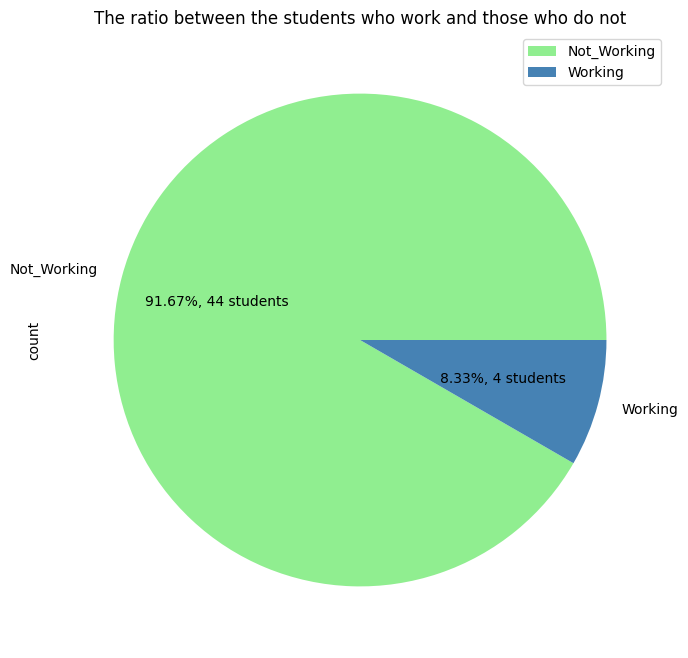

In [34]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
# dfyes = df[df['Is_Working'] == 1].sum()
# dfno = df[df['Is_Working'] == 0].sum()
dfyes = df['Is_Working'].isin([1]).sum()    # count the number of 1's in the column
dfno = df['Is_Working'].isin([0]).sum()     # count the number of 0's in the column
print("The ratio between the students who work and those who do not is ", dfyes / dfno)

temp = pd.DataFrame({'team': ['Working', 'Not_Working'], 'count': [dfyes, dfno]})   # create a dataframe to plot the graph

temp.groupby(['team']).sum().plot(kind='pie', y='count',        # plot the graph
                                colors = ['lightgreen', 'steelblue'],
                                title='The ratio between the students who work and those who do not',
                                autopct=lambda p:f'{p:.2f}%, {p*sum(temp["count"])/100:,.0f} students', figsize=[8,8])

Q3b) What is the average of the Expected GPA? Also, is there any anomaly on its value distribution?

A3b): The average of the Expected GPA is 3.2443749999999993. There is no anomaly on its value distribution. There is no outlier.

The average of the Expected GPA is  3.2443749999999993


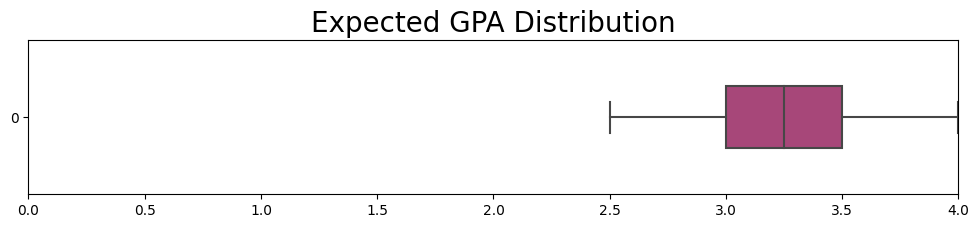

In [35]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,2))
plt.title("Expected GPA Distribution",fontsize=20)
sns.boxplot(data=df['Expected_GPA'], orient="h", width=0.4, palette="magma")        
plt.xlim(0, 4)
print("The average of the Expected GPA is ", df['Expected_GPA'].mean())

Q3c) What is the avergae of the Expected Letter Grade? Also, is there any anomaly on its value distribution?

A3c): The average of the Expected Letter Grade is  3.5104166666666665. There are two outliers.

The average of the Expected Letter Grade is  3.5104166666666665


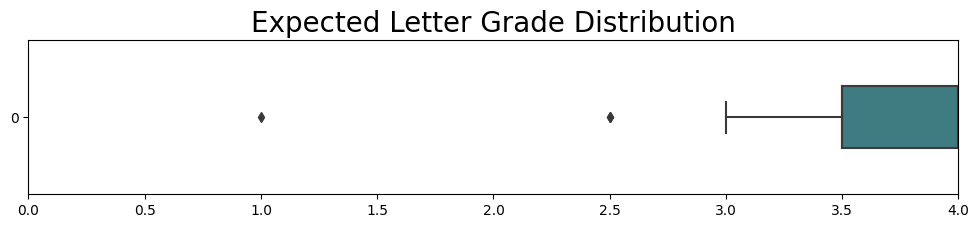

In [36]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM

fig = plt.figure(figsize=(12,2))
plt.title("Expected Letter Grade Distribution",fontsize=20)
sns.boxplot(data=df['Expected_Letter_Grade'], orient="h", width=0.4, palette="crest")      
plt.xlim(0, 4)
print("The average of the Expected Letter Grade is ", df['Expected_Letter_Grade'].mean())

Q3d) Is there a strong correlation ($r_{xy} > 0.5 || r_{xy} < -0.5$) between the travel time and Expected Letter Grade? If so, what is the sample Pearson correlation coefficient?

A3d): The correlation coefficient between Expected GPA and Expected Letter Grade is  0.06480851957470907. It is not a strong correlation.

The correlation coefficient between Expected GPA and Expected Letter Grade is  0.06480851957470907


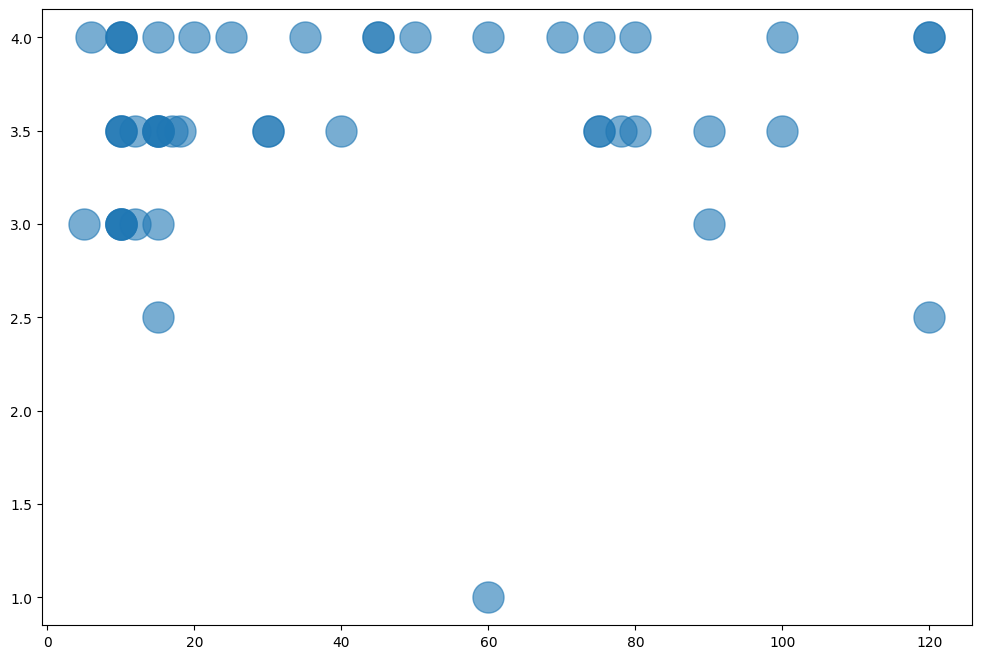

In [37]:
# PROVIDE AN ACCEPTABLE GRAPH AND CALCULATE THE CORRELATION COEFFICIENT TO SUPPORT THIS CLAIM
# P.S: You should not use the pandas' or sklearn's corr function for this section,
# you need to write it down from scratch.

def corr(x: pd.Series, y: pd.Series) -> float:
    x_mean = x.mean()
    y_mean = y.mean()
    cov_numerator = 0
    for i in range(x.count()):      # calculate the covariance
        cov_numerator += ((x[i] - x_mean) * (y[i] - y_mean))
    cov = cov_numerator / (x.count() - 1)
    
    x_std_numerator = 0         
    for i in x:
        x_std_numerator += ((i - x_mean) ** 2)  
    x_std = (x_std_numerator / (x.count() - 1)) ** 0.5      # calculate the standard deviation of x
    
    y_std_numerator = 0
    for i in y:
        y_std_numerator += ((i - y_mean) ** 2)
    y_std = (y_std_numerator / (y.count() - 1)) ** 0.5      # calculate the standard deviation of y
    
    corr = cov / (x_std * y_std)        # calculate the correlation coefficient
    return corr

print("The correlation coefficient between Expected GPA and Expected Letter Grade is ", corr(df['Travel_Time'], df['Expected_Letter_Grade']))

plt.figure(figsize=(12,8))
plt.scatter(df['Travel_Time'], df['Expected_Letter_Grade'], marker=".", alpha=0.6, s=2000)

Q3e) Define a threshold for travel time in which you will be able to group the individuals that are proximate and distant. Then, describe these groups to see which features have changed significantly and remained unchanged. Write the things that you noticed down below.

A3e): In the last cell, NaN cells stands for unchanged values and the other cells stand for changed values.

In [38]:
TAU = 20
df_p = df[df['Travel_Time'] <= TAU].reset_index()       # create a new dataframe with the values of travel time less than or equal 20
df_d = df[df['Travel_Time'] > TAU].reset_index()        # create a new dataframe with the values greater than 20
print("df[df['Travel_Time'] < 20] ↓↓↓↓↓↓↓↓↓")
display(df_p.describe())
print("df[df['Travel_Time'] > 20] ↓↓↓↓↓↓↓↓↓")
display(df_d.describe())

df[df['Travel_Time'] < 20] ↓↓↓↓↓↓↓↓↓


,index,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Study(Hrs),Hobbies(Hrs),Sports(Hrs),Socializing(Hrs),Entertainment(Hrs),Diet(1-5),Daily_Sugary_Drinks,Maths(1-5),Programming(1-5),Arts/Music(1-5),Sports(1-5)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,24.875000,2.695833,0.416667,3.209167,3.437500,12.291667,0.083333,16.416667,12.750000,5.541667,11.250000,11.333333,2.666667,1.333333,2.916667,3.791667,2.375000,3.083333
std,13.860524,0.756714,0.880547,0.337985,0.425096,3.676945,0.282330,12.367266,11.737158,4.273062,6.575647,10.968995,0.761387,0.637022,0.928611,0.721060,1.055524,1.138904
min,0.000000,0.000000,0.000000,2.500000,2.500000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,14.750000,2.345000,0.000000,3.000000,3.000000,10.000000,0.000000,10.000000,6.000000,2.000000,6.000000,4.750000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,26.000000,2.770000,0.000000,3.300000,3.500000,11.000000,0.000000,15.000000,10.000000,4.500000,10.000000,10.000000,2.500000,1.000000,3.000000,4.000000,2.000000,3.000000
75%,34.250000,3.140000,0.250000,3.500000,3.625000,15.000000,0.000000,20.000000,12.000000,8.000000,15.000000,13.000000,3.000000,1.250000,4.000000,4.000000,3.000000,4.000000
max,47.000000,3.770000,3.000000,3.800000,4.000000,20.000000,1.000000,48.000000,50.000000,15.000000,30.000000,50.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000


df[df['Travel_Time'] > 20] ↓↓↓↓↓↓↓↓↓


,index,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Is_Working,Study(Hrs),Hobbies(Hrs),Sports(Hrs),Socializing(Hrs),Entertainment(Hrs),Diet(1-5),Daily_Sugary_Drinks,Maths(1-5),Programming(1-5),Arts/Music(1-5),Sports(1-5)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,22.125000,2.975417,0.708333,3.279583,3.583333,70.541667,0.083333,14.625000,7.875000,4.166667,21.166667,14.666667,2.958333,1.791667,3.333333,3.958333,2.708333,3.500000
std,14.299019,0.568606,0.907896,0.293116,0.670280,29.215807,0.282330,10.239788,6.038374,3.198732,32.170290,15.705625,0.858673,1.062367,1.049500,0.954585,1.366658,1.021508
min,1.000000,2.000000,0.000000,3.000000,1.000000,25.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,9.750000,2.502500,0.000000,3.000000,3.500000,45.000000,0.000000,6.500000,5.000000,2.000000,9.500000,4.750000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000
50%,21.000000,3.100000,0.000000,3.200000,3.750000,75.000000,0.000000,13.500000,6.500000,3.500000,16.000000,11.500000,3.000000,1.500000,3.500000,4.000000,2.500000,3.000000
75%,35.250000,3.432500,1.000000,3.500000,4.000000,90.000000,0.000000,20.000000,10.000000,6.000000,20.000000,16.000000,4.000000,2.000000,4.000000,5.000000,3.250000,4.000000
max,46.000000,3.950000,3.000000,4.000000,4.000000,120.000000,1.000000,45.000000,30.000000,10.000000,168.000000,70.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [39]:
display(df_p.describe().compare(df_d.describe(), keep_shape=False, keep_equal=False, align_axis=0))

index       GPA  Repeat_Course_Num  Expected_GPA  \
mean self   24.875000  2.695833           0.416667      3.209167   
     other  22.125000  2.975417           0.708333      3.279583   
std  self   13.860524  0.756714           0.880547      0.337985   
     other  14.299019  0.568606           0.907896      0.293116   
min  self    0.000000  0.000000                NaN      2.500000   
     other   1.000000  2.000000                NaN      3.000000   
25%  self   14.750000  2.345000                NaN           NaN   
     other   9.750000  2.502500                NaN           NaN   
50%  self   26.000000  2.770000                NaN      3.300000   
     other  21.000000  3.100000                NaN      3.200000   
75%  self   34.250000  3.140000           0.250000           NaN   
     other  35.250000  3.432500           1.000000           NaN   
max  self   47.000000  3.770000                NaN      3.800000   
     other  46.000000  3.950000                NaN      4.000000   

            Expected_Letter_Grade  Travel_Time  Study(Hrs)  Hobbies(Hrs)  \
mean self                3.437500    12.291667   16.416667     12.750000   
     other               3.583333    70.541667   14.625000      7.875000   
std  self                0.425096     3.676945   12.367266     11.737158   
     other               0.670280    29.215807   10.239788      6.038374   
min  self                2.500000     5.000000    0.000000      1.000000   
     other               1.000000    25.000000    3.000000      0.000000   
25%  self                3.000000    10.000000   10.000000      6.000000   
     other               3.500000    45.000000    6.500000      5.000000   
50%  self                3.500000    11.000000   15.000000     10.000000   
     other               3.750000    75.000000   13.500000      6.500000   
75%  self                3.625000    15.000000         NaN     12.000000   
     other               4.000000    90.000000         NaN     10.000000   
max  self                     NaN    20.000000   48.000000     50.000000   
     other                    NaN   120.000000   45.000000     30.000000   

            Sports(Hrs)  Socializing(Hrs)  Entertainment(Hrs)  Diet(1-5)  \
mean self      5.541667         11.250000           11.333333   2.666667   
     other     4.166667         21.166667           14.666667   2.958333   
std  self      4.273062          6.575647           10.968995   0.761387   
     other     3.198732         32.170290           15.705625   0.858673   
min  self           NaN               NaN            1.000000   2.000000   
     other          NaN               NaN            0.000000   1.000000   
25%  self           NaN          6.000000                 NaN        NaN   
     other          NaN          9.500000                 NaN        NaN   
50%  self      4.500000         10.000000           10.000000   2.500000   
     other     3.500000         16.000000           11.500000   3.000000   
75%  self      8.000000         15.000000           13.000000   3.000000   
     other     6.000000         20.000000           16.000000   4.000000   
max  self     15.000000         30.000000           50.000000        NaN   
     other    10.000000        168.000000           70.000000        NaN   

            Daily_Sugary_Drinks  Maths(1-5)  Programming(1-5)  \
mean self              1.333333    2.916667          3.791667   
     other             1.791667    3.333333          3.958333   
std  self              0.637022    0.928611          0.721060   
     other             1.062367    1.049500          0.954585   
min  self                   NaN    1.000000               NaN   
     other                  NaN    2.000000               NaN   
25%  self                   NaN         NaN               NaN   
     other                  NaN         NaN               NaN   
50%  self              1.000000    3.000000               NaN   
     other             1.500000    3.500000               NaN  

Q3f) Define a threshold of $3.0$ for GPA and draw 3 plots side-by-side in which the x-axis is defined as the time for study and y-axis is chosen among time for hobbies, sports and socializing. Select an appropriate plot type for this task. Use green color to mark GPAs greater than or equal to $3.0$ and blue for GPAs lower than $3.0$. Do you notice any difference in preferences among these two segments? Do not forget to use a legend! 

A3f): Almost all of the people who have GPA greater than or equal to 3.0 or have GPA lower than 3.0 do not spend more than 25 hours on socializing.

Text(0, 0.5, 'Socializing(Hrs)')

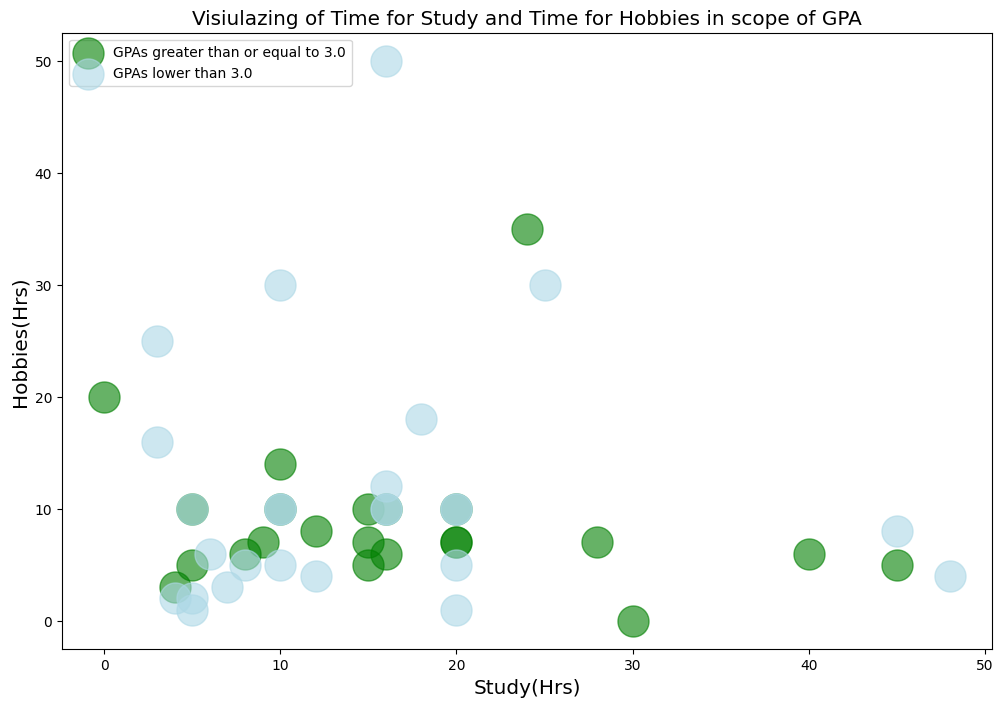

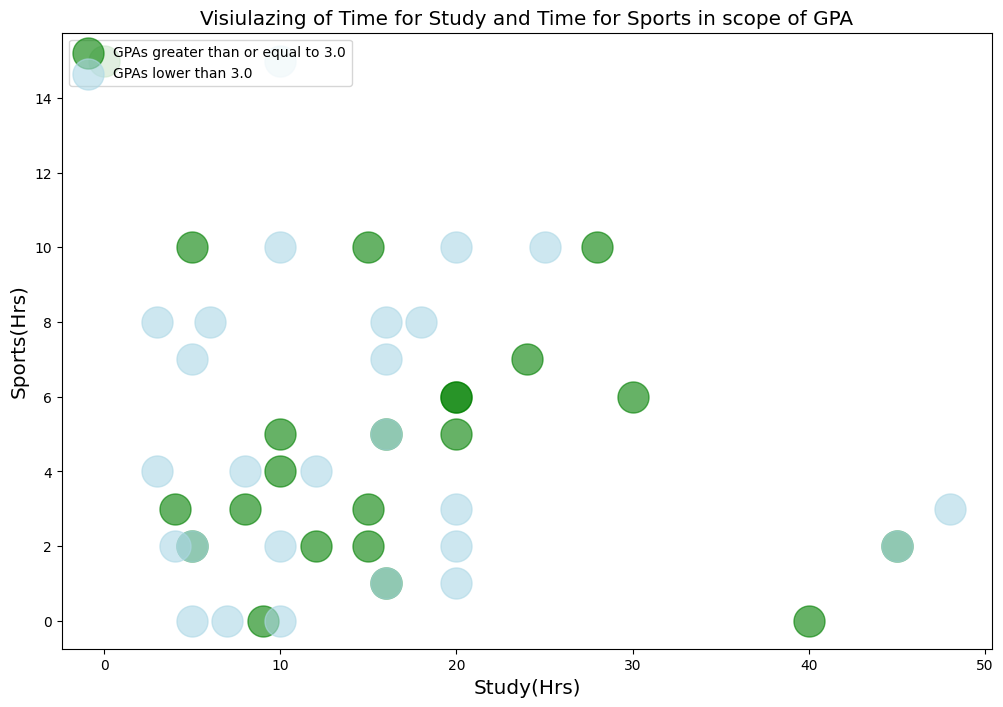

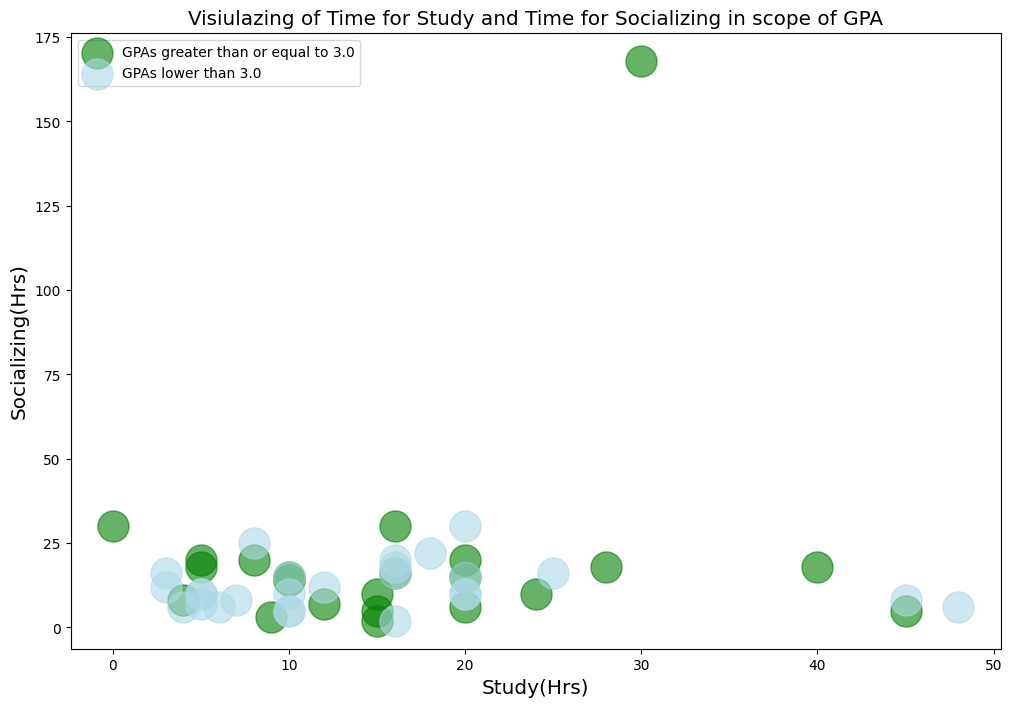

In [40]:
# WRITE YOUR IMPLEMENTATION HERE!! 
TAU = 3
df_u3 = df[df['GPA'] >= TAU].reset_index()      # create a new dataframe with the values of GPA greater than or equal 3
df_d3 = df[df['GPA'] < TAU].reset_index()       # create a new dataframe with the values less than 3

plt.figure(1,figsize=(12,8))      
plt.title("Visiulazing of Time for Study and Time for Hobbies in scope of GPA",fontsize="x-large")
display(plt.scatter(df_u3['Study(Hrs)'], df_u3['Hobbies(Hrs)'], color="green", marker=".", alpha=0.6, s=2000))
display(plt.scatter(df_d3['Study(Hrs)'], df_d3['Hobbies(Hrs)'], color="lightblue",marker=".", alpha=0.6, s=2000))
plt.legend(['GPAs greater than or equal to 3.0', 'GPAs lower than 3.0'],prop={'size': 10},loc=2)
plt.xlabel("Study(Hrs)",fontsize="x-large")
plt.ylabel("Hobbies(Hrs)",fontsize="x-large")

plt.figure(2,figsize=(12,8))
plt.title("Visiulazing of Time for Study and Time for Sports in scope of GPA",fontsize="x-large")
display(plt.scatter(df_u3['Study(Hrs)'], df_u3['Sports(Hrs)'], color="green", marker=".", alpha=0.6, s=2000))
display(plt.scatter(df_d3['Study(Hrs)'], df_d3['Sports(Hrs)'], color="lightblue",marker=".", alpha=0.6, s=2000))
plt.legend(['GPAs greater than or equal to 3.0', 'GPAs lower than 3.0'],prop={'size': 10},loc=2)
plt.xlabel("Study(Hrs)",fontsize="x-large")
plt.ylabel("Sports(Hrs)",fontsize="x-large")

plt.figure(3,figsize=(12,8))
plt.title("Visiulazing of Time for Study and Time for Socializing in scope of GPA",fontsize="x-large")
display(plt.scatter(df_u3['Study(Hrs)'], df_u3['Socializing(Hrs)'], color="green", marker=".", alpha=0.6, s=2000))
display(plt.scatter(df_d3['Study(Hrs)'], df_d3['Socializing(Hrs)'], color="lightblue",marker=".", alpha=0.6, s=2000))
plt.legend(['GPAs greater than or equal to 3.0', 'GPAs lower than 3.0'],prop={'size': 10},loc=2)
plt.xlabel("Study(Hrs)",fontsize="x-large")
plt.ylabel("Socializing(Hrs)",fontsize="x-large")

Q3g) Use the same GPA threshold and group the data frame into two segments as in the previous part. Select an appropriate plot type for depicting the time used for studying, sports and social activities, hobbies, and entertainment. Please include a legend for highlighting the differences between these two segments, and write down below if there are any significant differences in the preference of spending time.

A3g:)

KeyboardInterrupt: 

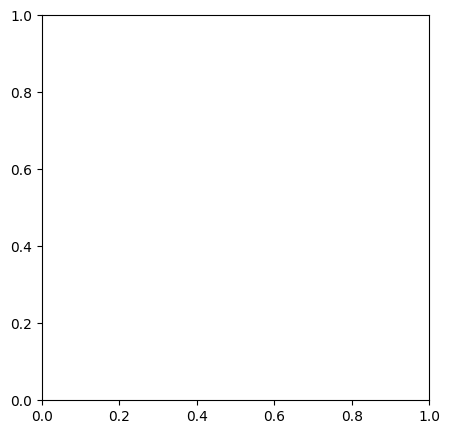

In [41]:
# WRITE YOUR IMPLEMENTATION HERE!! 
TAU = 3

df_test = {'GPA': df['GPA'],
        'Study(Hrs)': df['Sports(Hrs)'],
        'Sports_and_Social(Hrs)': df['Sports(Hrs)'] + df['Socializing(Hrs)'],
        'Hobbies(Hrs)': df['Hobbies(Hrs)'],
        'Entertainment(Hrs)': df['Entertainment(Hrs)']}
df_test['GPA'] = np.where(df['GPA'] >= 3, 'over_3', 'under_3')
df_Q3g = pd.DataFrame(data=df_test) 

sns.relplot(
    data=df_Q3g,
    x="Study(Hrs)",
    y="Sports_and_Social(Hrs)",
    style="GPA",
    hue="Hobbies(Hrs)",
    size="Entertainment(Hrs)",
    palette="rocket",
    sizes=(10, 400)).set(ylim=(0, 35))

Q3h) Do the same experimentation as (Q3g) for identifying whether there is any difference between the segments in terms of the requirements for math, programming, arts/music and sports.

A3h:)

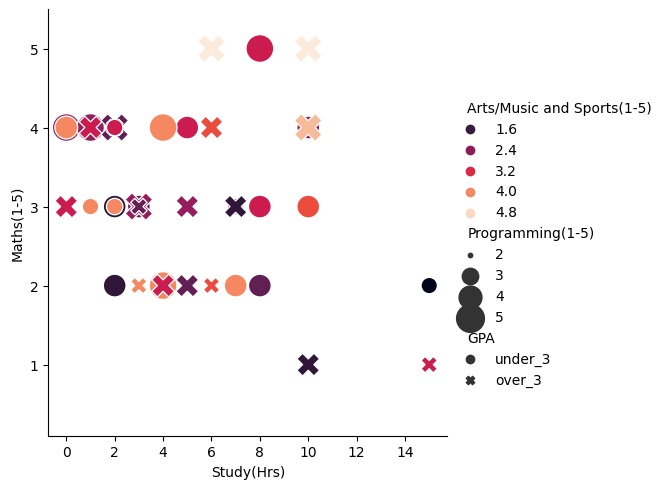

In [ ]:
# WRITE YOUR IMPLEMENTATION HERE!! 
TAU = 3

df_test = {'GPA': df['GPA'],
        'Study(Hrs)': df['Sports(Hrs)'],
        'Maths(1-5)': df['Maths(1-5)'],
        'Programming(1-5)': df['Programming(1-5)'],
        'Arts/Music and Sports(1-5)': (df['Arts/Music(1-5)'] + df['Sports(1-5)']) / 2}

df_test['GPA'] = np.where(df['GPA'] >= 3, 'over_3', 'under_3')
df_Q3g = pd.DataFrame(data=df_test) 

sns.relplot(
    data=df_Q3g,
    x="Study(Hrs)",
    y="Maths(1-5)",
    style="GPA",
    hue="Arts/Music and Sports(1-5)",
    size="Programming(1-5)",
    palette="rocket",
    sizes=(10, 400)).set(ylim=(0.1, 5.5))

# Q4) Covariance/Correlation Matrices 

Q4a) Find the covariance and correlation matrices of the variables, and plot them on a good-looking heatmap. You can use the pandas/sklearn functions for this task. Comment on your results.

<AxesSubplot:>

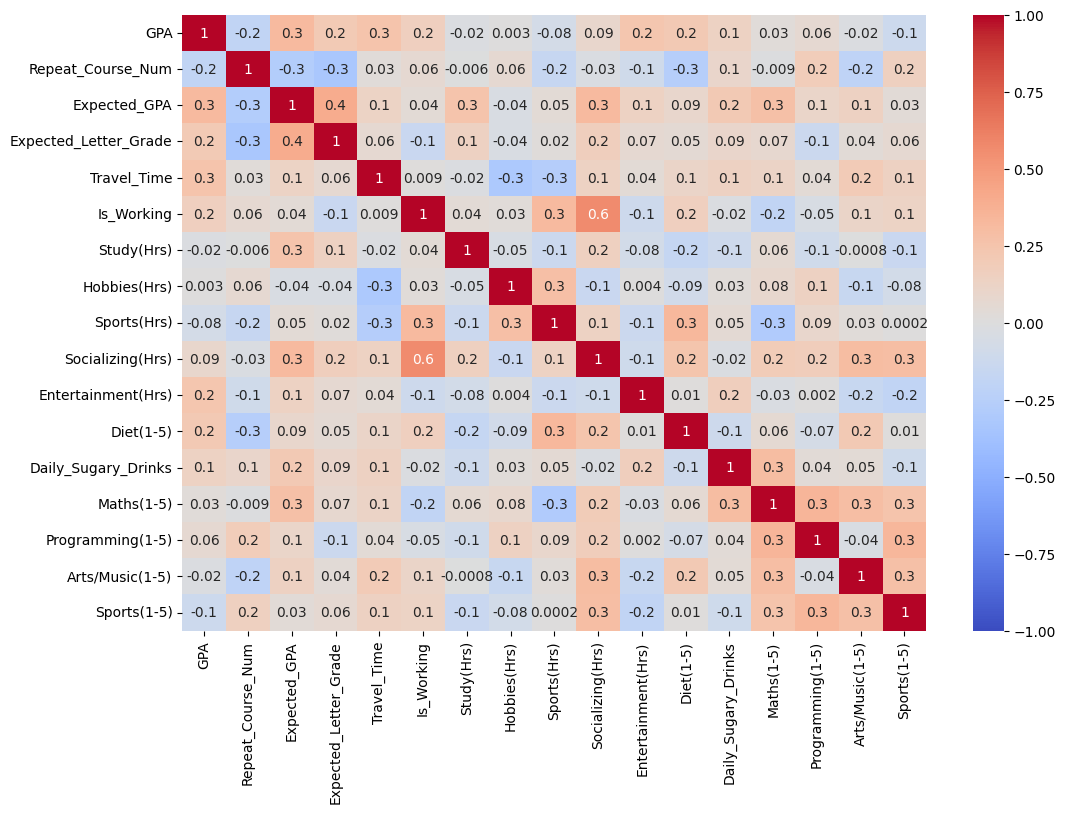

In [ ]:
# WRITE YOUR IMPLEMENTATION HERE!! 
plt.figure(figsize=(12,8))
corr = df.corr()        # calculate the correlation matrix
sns.heatmap(corr,       # plot the correlation matrix in heatmap
             cmap='coolwarm',
             annot=True,
             fmt='.1g',
             vmax=1,
             vmin=-1,)

# There is a strong correlation between the Is_Working and the Socializing

<AxesSubplot:>

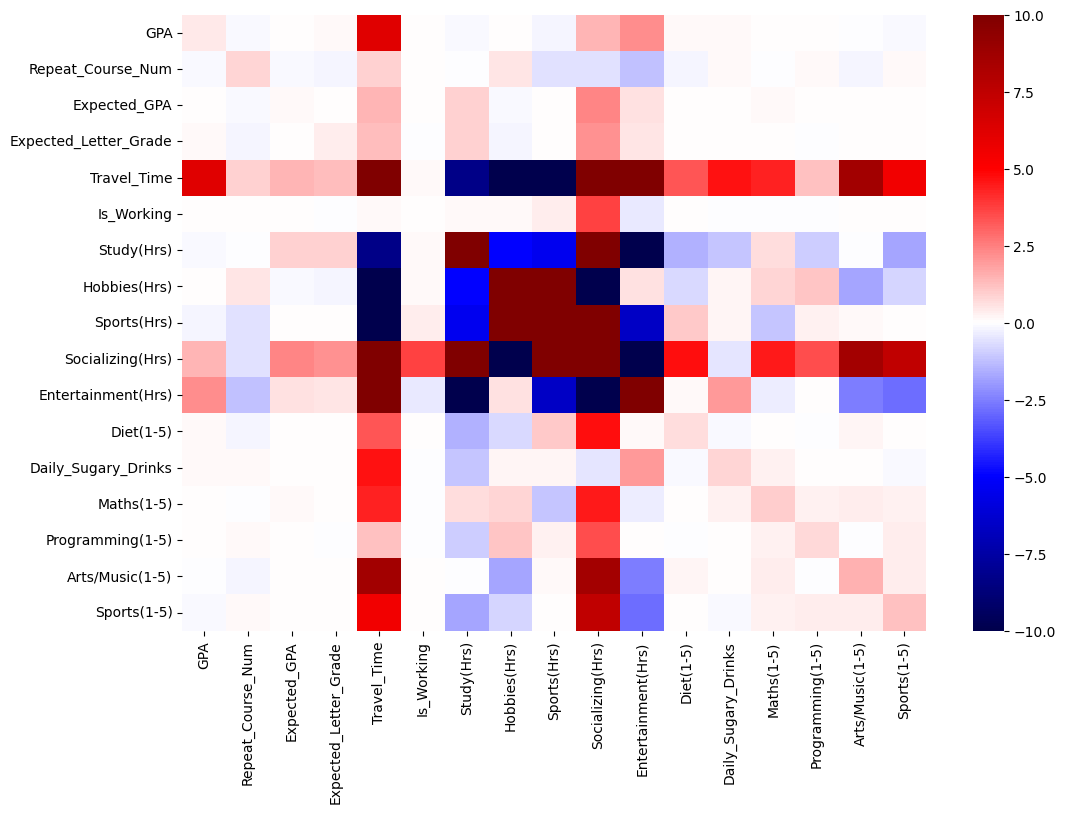

In [42]:
plt.figure(figsize=(12,8))
cov = df.cov()      # calculate the covariance matrix
sns.heatmap(cov,    # plot the covariance matrix in heatmap
            cmap='seismic',
            annot=False,
            vmax=10,
            vmin=-10,)

Q4b) Based on the correlation matrix, which of the variables are strongly ($r_{xy} > 0.5 || r_{xy} < -0.5$) correlated? Which variable tuple has the highest (anti)correlation?

A4b) The variables that are strongly correlated are: ('Is_Working', 'Socializing(Hrs)'). The variable tuple that has the highest correlation is ('Is_Working', 'Socializing(Hrs)').

# Q5) Hypothesis Testing

Select an appropriate test name and type for the hypothesis questions below and provide the p-value as well while defining the significance. You may want to use SciPy here.

Q5a) Do working students study less than their non-working counterparts?

In [ ]:
# WRITE YOUR IMPLEMENTATION HERE!! 
import scipy.stats as stats

df_workings = df[df['Is_Working'] == 1]         # create a new dataframe with the values of Is_Working equal to 1       
df_not_workings = df[df['Is_Working'] == 0]     # create a new dataframe with the values of Is_Working equal to 0

df_workings_size = len(df_workings)             # calculate the size of the new dataframes
df_not_workings_size = len(df_not_workings)

df_workings_mean = df_workings['Study(Hrs)'].mean()     # calculate the mean of the new dataframes
df_not_workings_mean = df_not_workings['Study(Hrs)'].mean()

df_workings_std = df_workings['Study(Hrs)'].std()       # calculate the standard deviation of the new dataframes
df_not_workings_std = df_not_workings['Study(Hrs)'].std()

data = {'Group':['Working', 'Not_Working'],             # create a new dataframe with the calculated values
        'Size':[df_workings_size, df_not_workings_size],
        'Mean':[df_workings_mean, df_not_workings_mean],
        'Std':[df_workings_std, df_not_workings_std]}
df_test = pd.DataFrame(data=data)                # create a new dataframe with the calculated values
display(df_test)
df_stats = stats.ttest_ind(df_workings['Study(Hrs)'], df_not_workings['Study(Hrs)'])    # calculate the t-test
print(df_stats)


,Group,Size,Mean,Std
0,Working,4,17.000000,12.489996
1,Not_Working,44,15.386364,11.299755


Ttest_indResult(statistic=0.27149029926092405, pvalue=0.7872286833893175)


A5a) Although the working students study more than their non-working counterparts, the difference is not significant. Because the p-value is 0.78, which is greater than 0.05.

Q5b) Do students having lower GPA tend to believe intelligence is more key for programming?

In [ ]:
# WRITE YOUR IMPLEMENTATION HERE!! 


Q5c) Do students which are expecting higher GPA study more than the average?

In [ ]:
# WRITE YOUR IMPLEMENTATION HERE!! 
import scipy.stats as stats
df_mean = df['Expected_GPA'].mean()
df_mean
df_he = df[df['Expected_GPA'] > df_mean].reset_index()
df_he_test = stats.ttest_1samp(df_he['Expected_GPA'], df_mean)
df_he_test

Ttest_1sampResult(statistic=7.019661159509284, pvalue=3.7429270362164744e-07)